# LSTM for univariate time series

In [1]:
import pandas as pd
import numpy as np

project_path = '/Users/chizhang/Documents/GitHub/piepy/'
path = 'data/Rainfall_data.csv'

# load data
df = pd.read_csv(project_path + path)
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [2]:
# merge and produce time stamps
df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.head(1)

len(df.columns) # now it's 7

df = df.set_index('Timestamp')
df = df.sort_values(by = 'Timestamp')
# drop the first three
df = df.drop(['Year', 'Month', 'Day'], axis = 1)

df.head()

,Specific Humidity,Relative Humidity,Temperature,Precipitation
Timestamp,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [6]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
print(train_size)
train, test = df[:train_size], df[train_size:]

# Scale the features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

201


In [9]:
# lstm
# Scale the data

scaler = MinMaxScaler()
features = ['Specific Humidity', 'Relative Humidity', 'Temperature']
target = 'Precipitation'
train_scaled = scaler.fit_transform(train[[target]])
test_scaled = scaler.transform(test[[target]])


In [10]:
# Prepare the data for LSTM
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)


time_steps = 10  # You can adjust this based on your data
train_sequences, y_train = create_sequences(train_scaled, time_steps)
test_sequences, y_test = create_sequences(test_scaled, time_steps)

# Reshape the data for LSTM input (number of samples, time steps, features)
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], train_sequences.shape[1], 1))
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))


In [11]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(train_sequences, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
test_predictions_scaled = model.predict(test_sequences)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error for LSTM on Test Set: {mse_test}')

Epoch 1/50


/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 1s - 93ms/step - loss: 0.0812
Epoch 2/50
6/6 - 0s - 3ms/step - loss: 0.0664
Epoch 3/50
6/6 - 0s - 4ms/step - loss: 0.0628
Epoch 4/50
6/6 - 0s - 3ms/step - loss: 0.0583
Epoch 5/50
6/6 - 0s - 3ms/step - loss: 0.0532
Epoch 6/50
6/6 - 0s - 3ms/step - loss: 0.0489
Epoch 7/50
6/6 - 0s - 3ms/step - loss: 0.0442
Epoch 8/50
6/6 - 0s - 3ms/step - loss: 0.0394
Epoch 9/50
6/6 - 0s - 3ms/step - loss: 0.0357
Epoch 10/50
6/6 - 0s - 3ms/step - loss: 0.0339
Epoch 11/50
6/6 - 0s - 3ms/step - loss: 0.0324
Epoch 12/50
6/6 - 0s - 3ms/step - loss: 0.0309
Epoch 13/50
6/6 - 0s - 3ms/step - loss: 0.0304
Epoch 14/50
6/6 - 0s - 3ms/step - loss: 0.0308
Epoch 15/50
6/6 - 0s - 3ms/step - loss: 0.0283
Epoch 16/50
6/6 - 0s - 3ms/step - loss: 0.0293
Epoch 17/50
6/6 - 0s - 3ms/step - loss: 0.0298
Epoch 18/50
6/6 - 0s - 3ms/step - loss: 0.0284
Epoch 19/50
6/6 - 0s - 3ms/step - loss: 0.0282
Epoch 20/50
6/6 - 0s - 3ms/step - loss: 0.0273
Epoch 21/50
6/6 - 0s - 3ms/step - loss: 0.0276
Epoch 22/50
6/6 - 0s - 3ms/step 

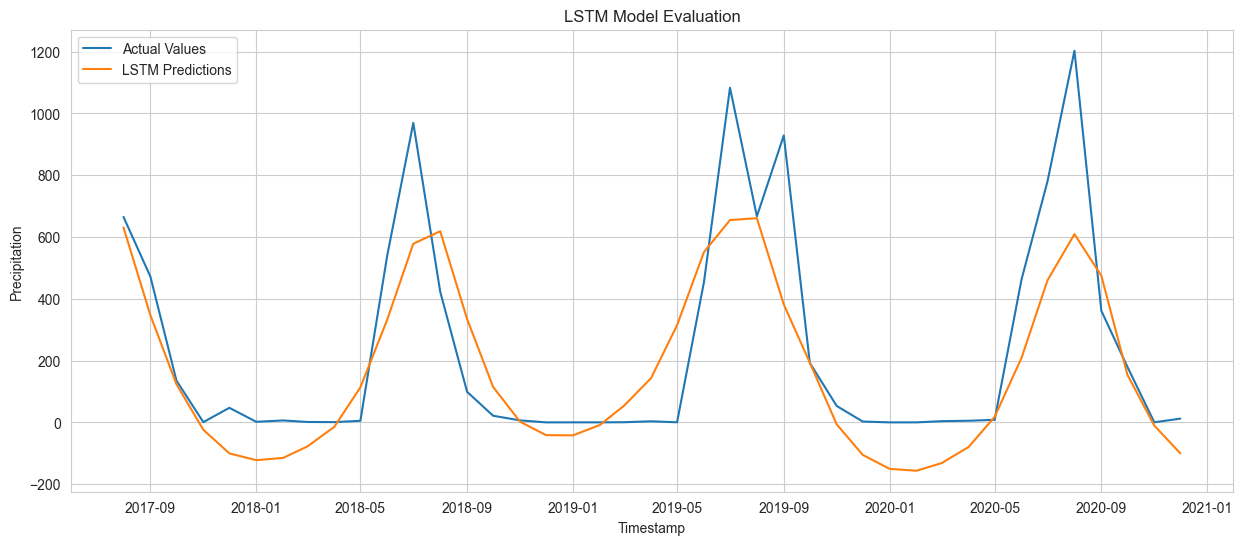

In [13]:
import matplotlib.pyplot as plt
# Visualize LSTM predictions vs actual values on the test set
plt.figure(figsize=(15, 6))
plt.plot(test.index[time_steps:], test[target][time_steps:], label='Actual Values')
plt.plot(test.index[time_steps:], test_predictions, label='LSTM Predictions')
plt.title('LSTM Model Evaluation')
plt.xlabel('Timestamp')
plt.ylabel(target)
plt.legend()
plt.show()